In [226]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

# set the random number generator
np.random.seed(7)
import math

In [227]:
def step(state, p1, p2, concurrentUse):
    zone_A(state, flip(p1), 10, concurrentUse)
    zone_B(state, flip(p2), 20, concurrentUse)
      
        
def zone_A(state, t, amount_used, concurrentUse):
    s = state.a 
    c = state.batt_A
    t = concurrentUse*t
    
    state.batt_A =  math.floor(((s-t)*c + t*(c- amount_used)) / s)


def zone_B(state, t, amount_used, concurrentUse):
    s = state.b 
    c = state.batt_B
    t = concurrentUse*t
    
    state.batt_B =  math.floor(((s-t)*c + t*(c- amount_used)) / s)


In [228]:
def run_simulation(state, p1, p2, num_steps, concurrentUse):
    
    resultsA = TimeSeries()
    resultsB = TimeSeries() 
    for i in range(num_steps):
        step(state, p1, p2, concurrentUse)
        resultsA[i] = state.batt_A
        resultsB[i] = state.batt_B
    
    plot(resultsA, label='Jamaica')
    plot(resultsB, label='Forest Hills')
    
        
def decorate_limeshare():
    """Add a title and label the axes."""
    decorate(title='Lime Scooters in Jamaica vs. Forest Hills',
             xlabel='Time step (hour)', 
             ylabel='Average Battery for Zone')

In [229]:

limeshare = State(a=20, b=30, batt_A=100, batt_B=100)
limeshare

,values
a,20
b,30
batt_A,100
batt_B,100


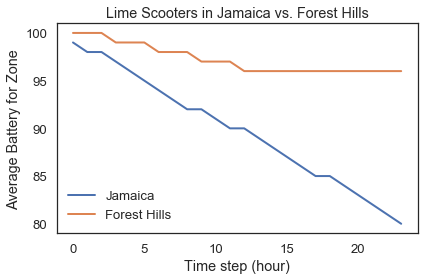

In [230]:
run_simulation(limeshare, 0.75, 0.2, 24, 1)
decorate_limeshare()

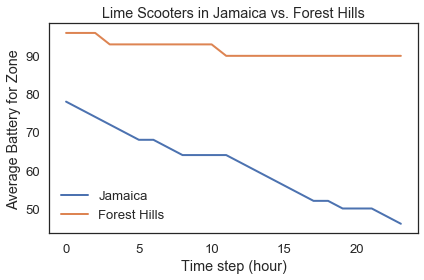

In [231]:
run_simulation(limeshare, 0.75, 0.2, 24, 4)
decorate_limeshare()

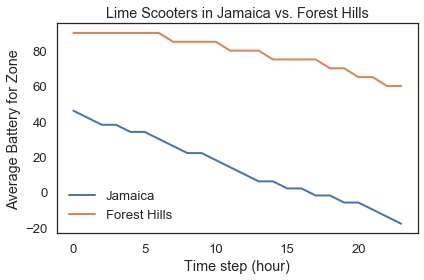

In [232]:
run_simulation(limeshare, 0.75, 0.2, 24, 7)
decorate_limeshare()

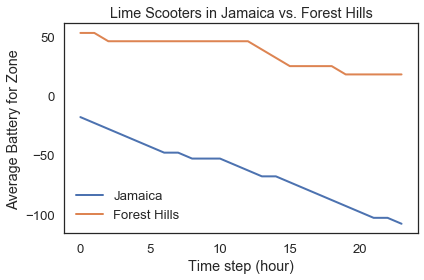

In [233]:
run_simulation(limeshare, 0.75, 0.2, 24, 10)
decorate_limeshare()